In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score

## Cleaning

Clean data. No much to filter.

In [3]:
skyObj = pd.read_csv('data/Skyserver_SQL4_7_2022 12_58_52 AM.csv',skiprows=1, index_col='objid')
skyObj = skyObj.sort_index()

In [4]:
skyObj.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,...,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,specobjid,class,redshift,plate,mjd,fiberid
objid,,,,,,,,,,,,,,,,,,,,,
1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,6,...,50.35183,92.27589,130.8493,172.3348,430194949951088640,GALAXY,0.032125,382,51816,368
1237645879578460255,51.443695,1.270073,19.52808,17.96541,17.03493,16.53754,16.14154,94,301,6,...,65.13789,153.47130,242.6524,349.4461,466235292731336704,GALAXY,0.121315,414,51869,410
1237645879578460271,51.483584,1.272013,18.72268,17.38520,16.81134,16.51803,16.29502,94,301,6,...,111.15240,188.56690,247.0515,303.3817,466232818830174208,GALAXY,0.048765,414,51869,401
1237645941291614227,49.627485,-1.041769,17.65612,16.17133,15.58940,15.37850,15.26744,109,301,1,...,339.99300,581.08730,705.6645,781.6734,1705795582662043648,STAR,-0.000098,1515,52932,208
1237645941824356443,40.285690,-0.714957,17.54884,15.75164,15.03100,14.66728,14.36099,109,301,2,...,500.42900,971.85570,1358.5900,1801.3750,459394680333821952,GALAXY,0.040287,408,51821,100


In [5]:
skyObj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 1237645879551066262 to 1237666339725967482
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ra           500000 non-null  float64
 1   dec          500000 non-null  float64
 2   u            500000 non-null  float64
 3   g            500000 non-null  float64
 4   r            500000 non-null  float64
 5   i            500000 non-null  float64
 6   z            500000 non-null  float64
 7   run          500000 non-null  int64  
 8   rerun        500000 non-null  int64  
 9   camcol       500000 non-null  int64  
 10  field        500000 non-null  int64  
 11  modelFlux_u  500000 non-null  float64
 12  modelFlux_g  500000 non-null  float64
 13  modelFlux_r  500000 non-null  float64
 14  modelFlux_i  500000 non-null  float64
 15  modelFlux_z  500000 non-null  float64
 16  specobjid    500000 non-null  uint64 
 17  class        500000 non-null  object

In [6]:
skyObj.isna().any()

ra             False
dec            False
u              False
g              False
r              False
i              False
z              False
run            False
rerun          False
camcol         False
field          False
modelFlux_u    False
modelFlux_g    False
modelFlux_r    False
modelFlux_i    False
modelFlux_z    False
specobjid      False
class          False
redshift       False
plate          False
mjd            False
fiberid        False
dtype: bool

In [7]:
skyObjData = skyObj[['ra','dec','u','g','r','i','z','run', 'rerun', 'camcol', 'field','modelFlux_u','modelFlux_g','modelFlux_r','modelFlux_i','modelFlux_z','redshift','plate','mjd','class']]

In [8]:
skyObjData

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,redshift,plate,mjd,class
objid,,,,,,,,,,,,,,,,,,,,
1237645879551066262,348.902530,1.271886,19.38905,18.24496,17.58728,17.20807,16.90905,94,301,6,94,17.55308,50.35183,92.27589,130.84930,172.334800,0.032125,382,51816,GALAXY
1237645879578460255,51.443695,1.270073,19.52808,17.96541,17.03493,16.53754,16.14154,94,301,6,512,15.44309,65.13789,153.47130,242.65240,349.446100,0.121315,414,51869,GALAXY
1237645879578460271,51.483584,1.272013,18.72268,17.38520,16.81134,16.51803,16.29502,94,301,6,512,32.42791,111.15240,188.56690,247.05150,303.381700,0.048765,414,51869,GALAXY
1237645941291614227,49.627485,-1.041769,17.65612,16.17133,15.58940,15.37850,15.26744,109,301,1,100,86.60657,339.99300,581.08730,705.66450,781.673400,-0.000098,1515,52932,STAR
1237645941824356443,40.285690,-0.714957,17.54884,15.75164,15.03100,14.66728,14.36099,109,301,2,37,95.60102,500.42900,971.85570,1358.59000,1801.375000,0.040287,408,51821,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237666339725770899,16.431388,0.278759,19.15993,17.73944,17.19984,17.01247,16.95844,4858,301,4,464,21.67752,80.20916,131.84460,156.67950,164.670500,-0.000166,2313,53726,STAR
1237666339725770910,16.459123,0.242289,17.43762,16.32839,15.84103,15.54875,15.32912,4858,301,4,464,105.91350,294.19960,460.88170,603.25520,738.504100,0.048067,396,51816,GALAXY
1237666339725770933,16.495017,0.348647,19.59377,19.37780,19.67887,19.96573,20.11692,4858,301,4,464,14.53616,17.73654,13.44063,10.31749,8.918069,-0.000133,694,52209,STAR


In [9]:
skyObjData.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,redshift,plate,mjd
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,500000.000000,5.000000e+05,5.000000e+05,500000.000000,500000.000000,5.000000e+05,500000.000000,500000.000000,500000.000000
mean,184.883287,26.993610,18.642071,17.416536,16.891576,16.593550,16.394705,3161.838304,301.0,3.493276,190.036564,6.199533e+01,2.094030e+02,376.448931,494.529395,5.710905e+02,0.172462,2227.048788,53623.901124
std,69.327689,20.892019,0.829097,0.984960,1.132459,20.067806,28.357076,1090.979194,0.0,1.593426,140.958690,2.994205e+03,1.964296e+03,2730.868538,3682.424859,5.086611e+03,0.433437,2054.014340,1477.028289
min,0.002795,-11.252825,6.752484,7.466997,8.449127,-9999.000000,-9999.000000,94.000000,301.0,1.000000,11.000000,1.445304e+01,1.003563e+01,-276.905600,-281.977100,-1.194468e+03,-0.004268,266.000000,51578.000000
25%,146.617060,7.229103,18.224177,16.863850,16.209238,15.878837,15.636038,2305.000000,301.0,2.000000,85.000000,1.956745e+01,5.968242e+01,92.424260,116.000875,1.287235e+02,0.000037,954.000000,52577.000000
50%,186.532990,29.631464,18.873805,17.531045,16.916115,16.620505,16.445845,3530.000000,301.0,4.000000,156.000000,2.821418e+01,9.718120e+01,171.219350,224.797150,2.640263e+02,0.051079,1676.000000,53228.000000
75%,225.418842,43.801855,19.271110,18.060380,17.585532,17.338830,17.225795,3927.000000,301.0,5.000000,254.000000,5.132453e+01,1.796632e+02,328.326525,445.105000,5.566213e+02,0.097835,2558.000000,54509.000000
max,359.998882,79.742295,19.600000,19.996050,33.209920,32.349170,30.846780,4858.000000,301.0,6.000000,831.000000,1.990702e+06,1.030864e+06,417204.700000,869349.300000,2.545457e+06,7.011245,11704.000000,58543.000000


In [10]:
# fig, ax = plt.subplots(figsize=(20,10))  
# sns.heatmap(skyObjData.corr(), cmap="YlGnBu", linewidths=0.1, annot=True, ax=ax)

In [11]:
# Drop dublicated features
skyObjData.drop_duplicates(inplace=True)

<ipython-input-11-0f81681346fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skyObjData.drop_duplicates(inplace=True)


In [12]:
skyObjData['class'].value_counts()

GALAXY    270432
STAR      176386
QSO        53182
Name: class, dtype: int64

## Visualization

Pending. Need more clean code.

In [13]:
targetCount = skyObjData['class'].value_counts()

In [14]:
print(f'Class 0: {targetCount[0]}')
print(f'Class 1: {targetCount[1]}')
print(f'Class 2: {targetCount[2]}')
print(f'Percentage of Majority Class: {round(targetCount[0] / sum(targetCount), 4)*100}')
print(f'Percentage of Minority Class: {round(targetCount[2] / sum(targetCount), 4)*100}')

Class 0: 270432
Class 1: 176386
Class 2: 53182
Percentage of Majority Class: 54.09
Percentage of Minority Class: 10.639999999999999


<AxesSubplot:xlabel='class', ylabel='count'>

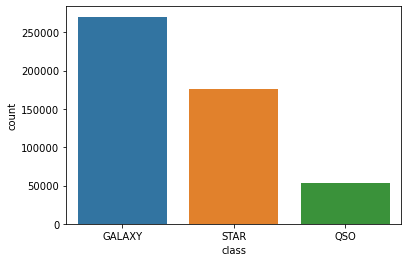

In [15]:
sns.countplot(x=skyObjData['class'],label="Count")

In [16]:
skyObjData['redshift_class'] = skyObjData['redshift'].apply(lambda x: True if x>=0 else False)

<ipython-input-16-4dce18402eb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skyObjData['redshift_class'] = skyObjData['redshift'].apply(lambda x: True if x>=0 else False)


In [17]:
skyObjData.groupby(['class', 'redshift_class']).redshift.agg(['count'])

count
class  redshift_class        
GALAXY False              138
       True            270294
QSO    True             53182
STAR   False           113045
       True             63341

<AxesSubplot:xlabel='class,redshift_class'>

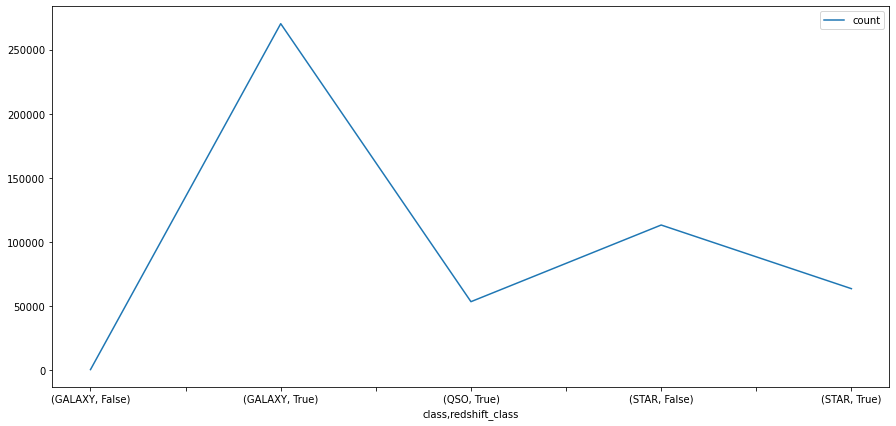

In [18]:
fig, ax = plt.subplots(figsize=(15,7))
skyObjData.groupby(['class', 'redshift_class']).redshift.agg(['count']).plot(ax=ax)
# True=>redshift & False=>blueshift

In [19]:
whos

Variable           Type           Data/Info
-------------------------------------------
accuracy_score     function       <function accuracy_score at 0x000002A925CA23A0>
auc                function       <function auc at 0x000002A925C23DC0>
ax                 AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
confusion_matrix   function       <function confusion_matrix at 0x000002A925CA24C0>
fig                Figure         Figure(1080x504)
make_scorer        function       <function make_scorer at 0x000002A925CE9E50>
np                 module         <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                 module         <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                module         <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
roc_auc_score      function       <function roc_auc_score at 0x000002A925C99040>
roc_curve          function       <function roc_curve at 0x000002A925C993A0>
score              function       <function pr

<AxesSubplot:xlabel='ra', ylabel='dec'>

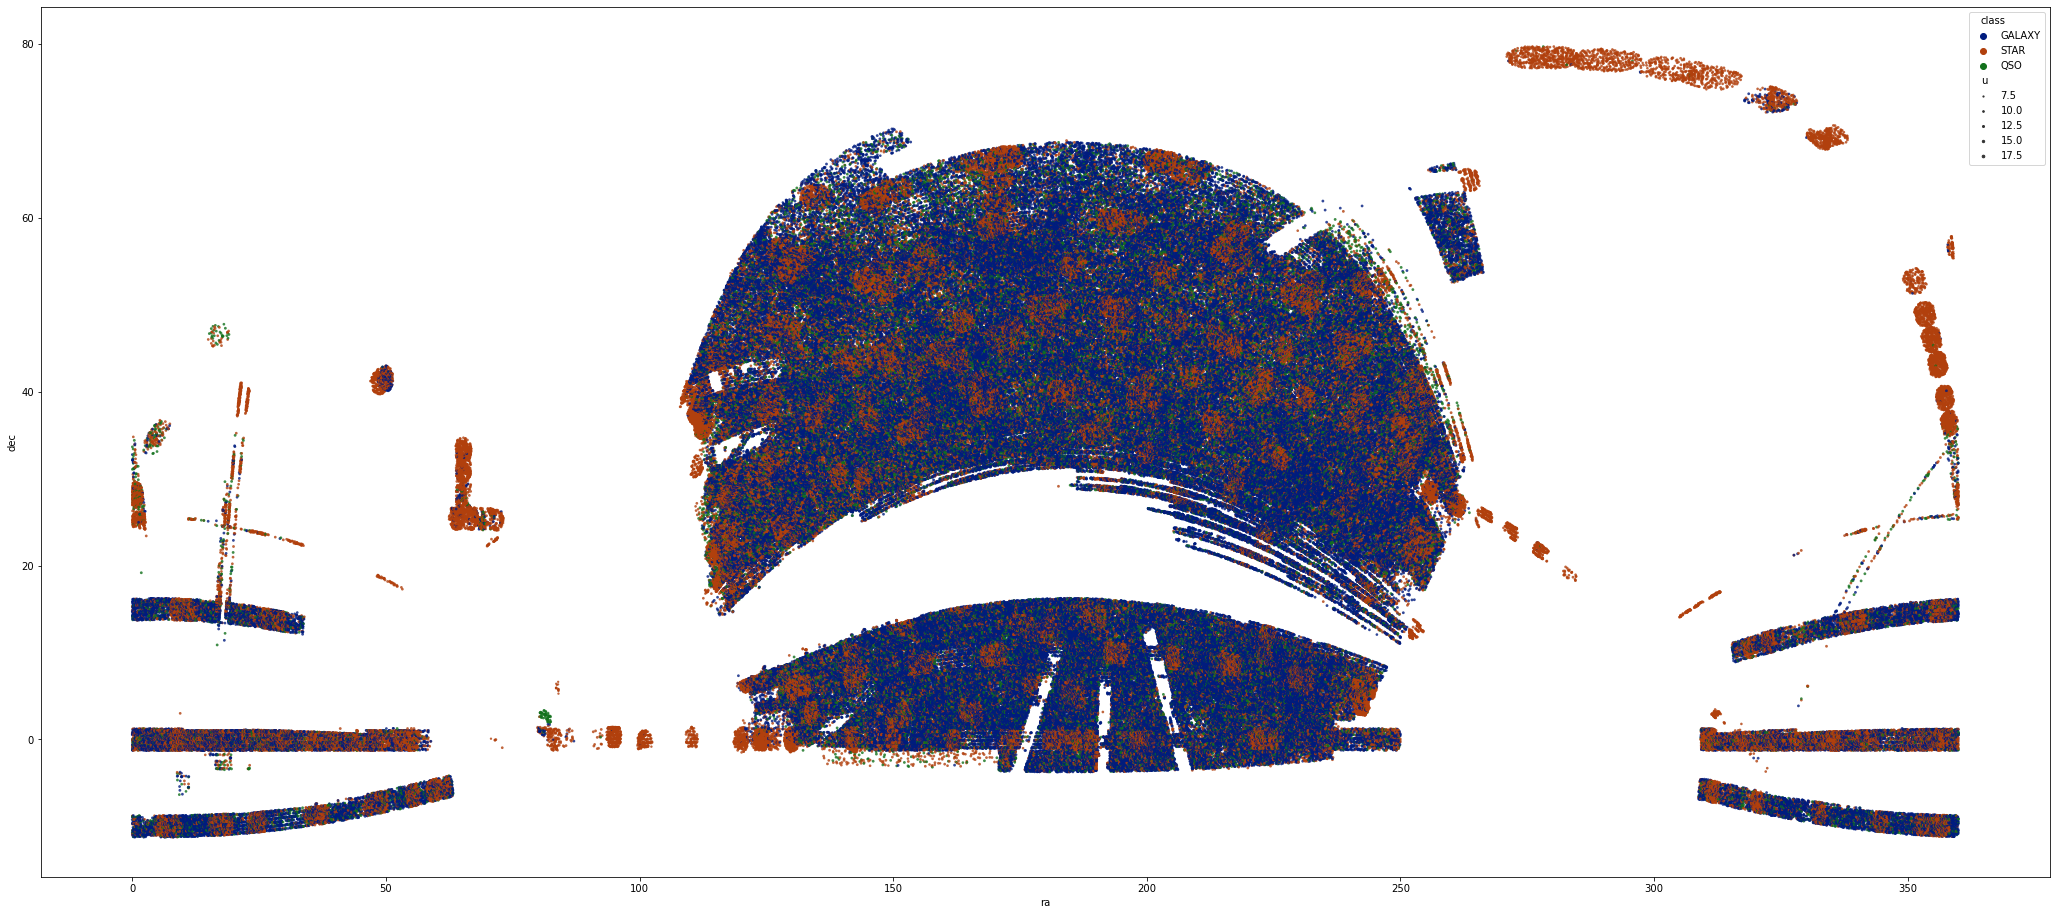

In [20]:
# distribution of astronomical objects via dec & ra
plt.figure(figsize=(36, 16))
sns.scatterplot(x="ra", y="dec",
                hue="class", alpha=0.8, size="u",
                palette='dark', 
                sizes=(1, 8), linewidth=0,
                data=skyObjData)

In [21]:
# plt.figure(figsize = (15,7))
# sns.pairplot(skyObjData[['class', 'u', 'g', 'r', 'i', 'z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z']], hue='class')

In [22]:
# plt.figure(figsize = (15,7))
# sns.pairplot(skyObjData[['class', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd']], hue='class')

## Feature Engineering

In [23]:
# limiting outlier values

# need to check this part

skyObjData[['i','z']] = skyObjData[['i','z']].clip(5,33)

C:\Users\Sheetal\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [24]:
# Colour Indexes-difference between the two spectrum range
skyObjData['color_u_g'] = skyObjData['u'] - skyObjData['g']
skyObjData['color_g_r'] = skyObjData['g'] - skyObjData['r']
skyObjData['color_r_i'] = skyObjData['r'] - skyObjData['i']
skyObjData['color_i_z'] = skyObjData['i'] - skyObjData['z']

In [25]:
skyObjData[['u', 'g', 'r', 'i', 'z', 'color_u_g', 'color_g_r', 'color_r_i', 'color_i_z']].head()

,u,g,r,i,z,color_u_g,color_g_r,color_r_i,color_i_z
objid,,,,,,,,,
1237645879551066262,19.38905,18.24496,17.58728,17.20807,16.90905,1.14409,0.65768,0.37921,0.29902
1237645879578460255,19.52808,17.96541,17.03493,16.53754,16.14154,1.56267,0.93048,0.49739,0.39600
1237645879578460271,18.72268,17.38520,16.81134,16.51803,16.29502,1.33748,0.57386,0.29331,0.22301
1237645941291614227,17.65612,16.17133,15.58940,15.37850,15.26744,1.48479,0.58193,0.21090,0.11106
1237645941824356443,17.54884,15.75164,15.03100,14.66728,14.36099,1.79720,0.72064,0.36372,0.30629


In [26]:
# conversions because the range of flux features are too wide
# 1 nanomaggies = 3.631 * 10^-6 Jansky ==> Jansky is a non-SI unit of spectral flux density
# 1js = 10^-26 W*m^-2*Hz^-1

cols = skyObjData.iloc[:, 11:16]
for i in cols:
    skyObjData[i] = skyObjData[i] * 3.631*(10**-6)

skyObjData.iloc[:, 11:16].describe()

,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,0.000225,0.000760,0.001367,0.001796,0.002074
std,0.010872,0.007132,0.009916,0.013371,0.018469
min,0.000052,0.000036,-0.001005,-0.001024,-0.004337
25%,0.000071,0.000217,0.000336,0.000421,0.000467
50%,0.000102,0.000353,0.000622,0.000816,0.000959
75%,0.000186,0.000652,0.001192,0.001616,0.002021
max,7.228239,3.743067,1.514870,3.156607,9.242554


In [27]:
# log transformation to decrease the effect of the outliers

skyObjData['logRedshift'] = (skyObjData['redshift']+1).transform(np.log)

In [28]:
# Encode target

objects = {"STAR": 0, "GALAXY": 1, "QSO": 2}
skyObjData['class'] = skyObjData['class'].map(objects)

In [29]:
skyObjData.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,...,modelFlux_z,redshift,plate,mjd,class,color_u_g,color_g_r,color_r_i,color_i_z,logRedshift
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.0,500000.000000,...,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,184.883287,26.993610,18.642071,17.416536,16.891576,16.633566,16.474737,3161.838304,301.0,3.493276,...,0.002074,0.172462,2227.048788,53623.901124,0.753592,1.225536,0.524959,0.258011,0.158829,0.119760
std,69.327689,20.892019,0.829097,0.984960,1.132459,1.210996,1.285197,1090.979194,0.0,1.593426,...,0.018469,0.433437,2054.014340,1477.028289,0.631205,0.528009,0.340319,0.266805,0.282931,0.245661
min,0.002795,-11.252825,6.752484,7.466997,8.449127,5.000000,5.000000,94.000000,301.0,1.000000,...,-0.004337,-0.004268,266.000000,51578.000000,0.000000,-6.963016,-14.784580,-15.859360,-16.641130,-0.004277
25%,146.617060,7.229103,18.224177,16.863850,16.209238,15.878837,15.636038,2305.000000,301.0,2.000000,...,0.000467,0.000037,954.000000,52577.000000,0.000000,0.974920,0.324710,0.146200,0.050660,0.000037
50%,186.532990,29.631464,18.873805,17.531045,16.916115,16.620505,16.445845,3530.000000,301.0,4.000000,...,0.000959,0.051079,1676.000000,53228.000000,1.000000,1.233790,0.535990,0.286490,0.158350,0.049817
75%,225.418842,43.801855,19.271110,18.060380,17.585532,17.338830,17.225795,3927.000000,301.0,5.000000,...,0.002021,0.097835,2558.000000,54509.000000,1.000000,1.572440,0.763410,0.399073,0.283190,0.093340
max,359.998882,79.742295,19.600000,19.996050,33.209920,32.349170,30.846780,4858.000000,301.0,6.000000,...,9.242554,7.011245,11704.000000,58543.000000,2.000000,6.060500,5.553990,14.287080,16.548340,2.080846


In [30]:
# Reorder columns

skyObjData=skyObjData[['class', 'u', 'g', 'r', 'i', 'z',
        'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i', 'modelFlux_z',
        'color_u_g', 'color_g_r', 'color_r_i','color_i_z', 
        'logRedshift','ra', 'dec', 'redshift','redshift_class',
        'rerun', 'camcol', 'field','plate', 'mjd']]
skyObjData.head()

,class,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,...,logRedshift,ra,dec,redshift,redshift_class,rerun,camcol,field,plate,mjd
objid,,,,,,,,,,,,,,,,,,,,,
1237645879551066262,1,19.38905,18.24496,17.58728,17.20807,16.90905,0.000064,0.000183,0.000335,0.000475,...,0.031619,348.902530,1.271886,0.032125,True,301,6,94,382,51816
1237645879578460255,1,19.52808,17.96541,17.03493,16.53754,16.14154,0.000056,0.000237,0.000557,0.000881,...,0.114502,51.443695,1.270073,0.121315,True,301,6,512,414,51869
1237645879578460271,1,18.72268,17.38520,16.81134,16.51803,16.29502,0.000118,0.000404,0.000685,0.000897,...,0.047613,51.483584,1.272013,0.048765,True,301,6,512,414,51869
1237645941291614227,0,17.65612,16.17133,15.58940,15.37850,15.26744,0.000314,0.001235,0.002110,0.002562,...,-0.000098,49.627485,-1.041769,-0.000098,False,301,1,100,1515,52932
1237645941824356443,1,17.54884,15.75164,15.03100,14.66728,14.36099,0.000347,0.001817,0.003529,0.004933,...,0.039496,40.285690,-0.714957,0.040287,True,301,2,37,408,51821


## Training

In [31]:
from sklearn.model_selection import train_test_split, cross_validate

In [32]:
# Basic validation: splitting the data 60 - 20 - 20 train/val/test
# Utilize holdout data at the end for the most efficient algorithm

X_tr, X_holdout, y_tr, y_holdout = train_test_split(skyObjData.iloc[:, 1:18], skyObjData.loc[:, 'class'], test_size=0.2,random_state=76)
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=.25, random_state=76)

X_train.shape # shape of my train set

(300000, 17)

In [33]:
X_test.shape # shape of test data

(100000, 17)

In [34]:
X_holdout.shape

(100000, 17)

In [35]:
def plotConfusionMatrixDF(cnf):
    
    cnfDf = pd.DataFrame(cnf, index=['Galaxy','Star','Quasar'], columns=['Galaxy','Star','Quasar'])
    
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cnfDf, annot=True, fmt='')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [36]:
comparisonColumns = ['Model','Training Accurary','Testing Accurary','Precision','Recall','F1 Score']

In [37]:
comparisonData = []

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logisticRegression = LogisticRegression()

In [40]:
logisticRegression.fit(X_train,y_train)

C:\Users\Sheetal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
classPredictionLr = logisticRegression.predict(X_test)

In [42]:
lrTrainAccurary = round(logisticRegression.score(X_train,y_train)*100,2)
print("Training Score : ",lrTrainAccurary)

Training Score :  80.8


In [43]:
lrTestAccuracy = round(accuracy_score(y_test,classPredictionLr)*100,2)
print("Testing Score: ",lrTestAccuracy)

Testing Score:  81.01


In [44]:
precisionLr, recallLr, f1scoreLr, supportLr = score(y_test, classPredictionLr, average='macro')
print(f'Precision : {precisionLr}')
print(f'Recall    : {recallLr}')
print(f'F1-score   : {f1scoreLr}')

Precision : 0.8119516775709977
Recall    : 0.8218371590765144
F1-score   : 0.8165372956884762


In [45]:
comparisonData.append(['Logistic Regression',lrTrainAccurary,lrTestAccuracy,precisionLr,recallLr,f1scoreLr])

In [46]:
lrConfusionMatrix = confusion_matrix(y_test,classPredictionLr)
print(lrConfusionMatrix)

[[25426  8059  1602]
 [ 8034 46170   148]
 [  138  1009  9414]]


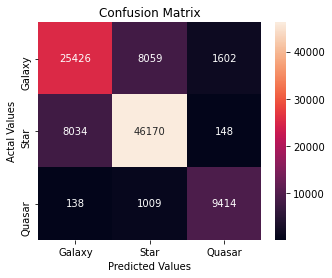

In [47]:
plotConfusionMatrixDF(lrConfusionMatrix)

## Naive Bayes

### GaussianNB 

In [48]:
from sklearn.naive_bayes import GaussianNB

In [49]:
gaussianNB = GaussianNB()

In [50]:
gaussianNB.fit(X_train,y_train)

GaussianNB()

In [51]:
gnbPrediction = gaussianNB.predict(X_test)

In [52]:
gnbTrainAccuracy = round(gaussianNB.score(X_train,y_train)*100,2)
print("Training Score : ",gnbTrainAccuracy)

Training Score :  85.16


In [53]:
gnbTestAccuracy = round(accuracy_score(y_test,gnbPrediction)*100,2)
print("Testing Score: ",gnbTestAccuracy)

Testing Score:  85.23


In [54]:
precisionGnb, recallGnb, f1scoreGnb, supportGnb = score(y_test, gnbPrediction, average='macro')
print(f'Precision : {precisionGnb}')
print(f'Recall    : {recallGnb}')
print(f'F1-score   : {f1scoreGnb}')

Precision : 0.8198619184909067
Recall    : 0.8545078662113071
F1-score   : 0.8144224821673348


In [55]:
comparisonData.append(['GaussianNB',gnbTrainAccuracy,gnbTestAccuracy,precisionGnb,recallGnb,f1scoreGnb])

In [56]:
gnbConfusionMatrix = confusion_matrix(y_test,gnbPrediction)
print(gnbConfusionMatrix)

[[23104  7411  4572]
 [  541 52140  1671]
 [    4   569  9988]]


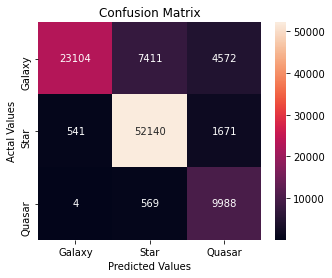

In [57]:
plotConfusionMatrixDF(gnbConfusionMatrix)

### Bernoulli NB

In [58]:
from sklearn.naive_bayes import BernoulliNB

In [59]:
bernoulliNB = BernoulliNB()

In [60]:
bernoulliNB.fit(X_train,y_train)

BernoulliNB()

In [61]:
bnbPredictions = bernoulliNB.predict(X_test)

In [62]:
bnbTrainAccuracy = round(bernoulliNB.score(X_train,y_train)*100,2)
print("Training Score : ",bnbTrainAccuracy)

Training Score :  80.98


In [63]:
bnbTestAccuracy = round(accuracy_score(y_test,bnbPredictions)*100,2)
print("Testing Score: ",bnbTestAccuracy)

Testing Score:  81.17


In [64]:
precisionBnb, recallBnb, f1scoreBnb, supportBnb = score(y_test, bnbPredictions, average='macro')
print(f'Precision : {precisionBnb}')
print(f'Recall    : {recallBnb}')
print(f'F1-score   : {f1scoreBnb}')

Precision : 0.7869009678830675
Recall    : 0.7194532027165147
F1-score   : 0.7387125270990932


In [65]:
comparisonData.append(['BernoulliNB',bnbTrainAccuracy,bnbTestAccuracy,precisionBnb,recallBnb,f1scoreBnb])

In [66]:
bnbConfusionMatrix = confusion_matrix(y_test,bnbPredictions)
bnbConfusionMatrix

array([[22700,  9841,  2546],
       [  453, 52761,  1138],
       [  324,  4527,  5710]], dtype=int64)

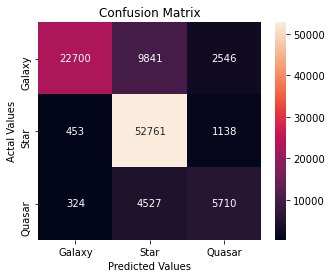

In [67]:
plotConfusionMatrixDF(bnbConfusionMatrix)

## Linear SVC

In [68]:
from sklearn.svm import LinearSVC

In [69]:
linearSVC = LinearSVC()

In [70]:
linearSVC.fit(X_train,y_train)

C:\Users\Sheetal\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [71]:
classPredictionSVC = linearSVC.predict(X_test)

In [72]:
svcTrainAccuracy = round(linearSVC.score(X_train,y_train)*100,2)
print("Training Score : ",svcTrainAccuracy)

Training Score :  87.14


In [73]:
svcTestAccuracy = round(accuracy_score(y_test,classPredictionSVC)*100,2)
print("Testing Score: ",svcTestAccuracy)

Testing Score:  87.24


In [74]:
precisionSvc, recallSvc, f1scoreSvc, supportSvc = score(y_test, classPredictionSVC, average='macro')
print(f'Precision : {precisionSvc}')
print(f'Recall    : {recallSvc}')
print(f'F1-score   : {f1scoreSvc}')

Precision : 0.9264924802992717
Recall    : 0.8503656439818216
F1-score   : 0.8767918048587552


In [75]:
comparisonData.append(['Linear SVC',svcTrainAccuracy,svcTestAccuracy,precisionSvc,recallSvc,f1scoreSvc])

In [76]:
svcConfusionMatrix = confusion_matrix(y_test,classPredictionSVC)
svcConfusionMatrix

array([[24464, 10618,     5],
       [  629, 53614,   109],
       [    2,  1398,  9161]], dtype=int64)

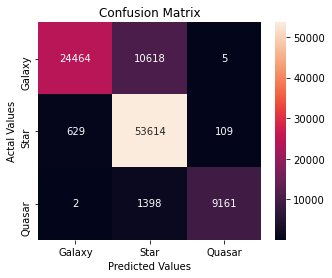

In [77]:
plotConfusionMatrixDF(svcConfusionMatrix)

## Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dtree = DecisionTreeClassifier()

In [80]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
classPredictionTree = dtree.predict(X_test)

In [82]:
dtreeTrainAccuracy = round(dtree.score(X_train,y_train)*100,2)
print("Training Score : ",dtreeTrainAccuracy)

Training Score :  100.0


In [83]:
dtreeTestAccuracy = round(accuracy_score(y_test,classPredictionTree)*100,2)
print("Testing Score: ",dtreeTestAccuracy)

Testing Score:  99.02


In [84]:
precisionDtree, recallDtree, f1scoreDtree, supportDtree = score(y_test, classPredictionTree, average='macro')
print(f'Precision : {precisionDtree}')
print(f'Recall    : {recallDtree}')
print(f'F1-score   : {f1scoreDtree}')

Precision : 0.9833416843680837
Recall    : 0.9834434527012629
F1-score   : 0.9833925016060597


In [85]:
comparisonData.append(['Decision Tree',dtreeTrainAccuracy,dtreeTestAccuracy,precisionDtree,recallDtree,f1scoreDtree])

In [86]:
dtreeConfusionMatrix = confusion_matrix(y_test,classPredictionTree)
dtreeConfusionMatrix

array([[34993,    91,     3],
       [   73, 53872,   407],
       [    1,   402, 10158]], dtype=int64)

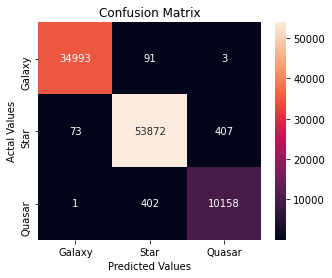

In [87]:
plotConfusionMatrixDF(dtreeConfusionMatrix)

In [88]:
# View feature importances
importances_dt = pd.DataFrame({'feature': X_train.columns,
                             'importance': dtree.feature_importances_})
importances_dt = importances_dt.sort_values('importance',ascending=False).set_index('feature')
importances_dt.head(17)

,importance
feature,
logRedshift,0.960005
color_u_g,0.013056
color_g_r,0.008810
color_r_i,0.005977
color_i_z,0.002651
dec,0.001601
ra,0.001315
z,0.000996
modelFlux_u,0.000893


# Classifier Comparison

In [89]:
comparisonDF = pd.DataFrame(comparisonData,columns=comparisonColumns)

In [90]:
comparisonDF

,Model,Training Accurary,Testing Accurary,Precision,Recall,F1 Score
0,Logistic Regression,80.80,81.01,0.811952,0.821837,0.816537
1,GaussianNB,85.16,85.23,0.819862,0.854508,0.814422
2,BernoulliNB,80.98,81.17,0.786901,0.719453,0.738713
3,Linear SVC,87.14,87.24,0.926492,0.850366,0.876792
4,Decision Tree,100.00,99.02,0.983342,0.983443,0.983393
